In [1]:
import pandas as pd

In [2]:
pd.read_csv("Assignment 4_Remedial.csv")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
lab=pd.read_csv("Assignment 4_Remedial.csv")

In [4]:
lab.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

# NUMBER ONE:
# BMI AND AGECATEGORY are key indicators of kidneyDisease where;
BMI:
The average BMI of people without kidney disease is approximately 28.26.
The average BMI of people with kidney disease is slightly higher, at 29.98. This suggests that higher BMI might be associated with kidney disease, but the difference is not large.

AgeCategory:
The data indicates that older age groups have more cases of kidney disease. Specifically, there is a notable frequency of kidney disease in people aged 70-74, 75-79, and 80 or older.
For people without kidney disease, the most common age categories are 65-69 and 60-64.
This preliminary analysis suggests that both BMI and AgeCategory might be related to the presence of kidney disease, but we need a more detailed analysis, such as logistic regression, to confirm whether these variables are statistically significant indicators.


In [5]:
#NUMBER TWO
# This explains  the distribution btwn any continous variables thus the use of  KidneyDisease in relation to BMI and AgeCategory
# Here we shall  group by KidneyDisease and see the mean BMI and AgeCategory frequencies
kidney_bmi_age_summary = lab.groupby('KidneyDisease').agg({
    'BMI': 'mean',
    'AgeCategory': 'value_counts'
}).unstack()

# here we are Displaying the summary of BMI and AgeCategory in relation to KidneyDisease
kidney_bmi_age_summary


BMI          No                       28.262296
             Yes                      29.975492
             (No, 65-69)                    NaN
             (No, 60-64)                    NaN
             (No, 70-74)                    NaN
             (No, 55-59)                    NaN
             (No, 50-54)                    NaN
             (No, 80 or older)              NaN
             (No, 45-49)                    NaN
             (No, 18-24)                    NaN
             (No, 40-44)                    NaN
             (No, 35-39)                    NaN
             (No, 75-79)                    NaN
             (No, 30-34)                    NaN
             (No, 25-29)                    NaN
             (Yes, 70-74)                   NaN
             (Yes, 80 or older)             NaN
             (Yes, 65-69)                   NaN
             (Yes, 75-79)                   NaN
             (Yes, 60-64)                   NaN
             (Yes, 55-59)               

In [6]:
#NUMBER THREE:
# Calculating the probability that a person who smokes has SkinCancer
# We use conditional probability: P(SkinCancer | Smoking) = P(Smoking ∩ SkinCancer) / P(Smoking)

# Number of people who smoke and have SkinCancer
smokers_with_cancer = len(lab[(lab['Smoking'] == 'Yes') & (lab['SkinCancer'] == 'Yes')])

# Total number of smokers
total_smokers = len(lab[lab['Smoking'] == 'Yes'])

# Probability that a smoker has SkinCancer
probability_smoker_skin_cancer = smokers_with_cancer / total_smokers

probability_smoker_skin_cancer


0.10503532765260636

P(SkinCancer | Smoking) = P(Smoking ∩ SkinCancer) / P(Smoking)
The probability that a person who smokes has skin cancer is approximately 10.5%.

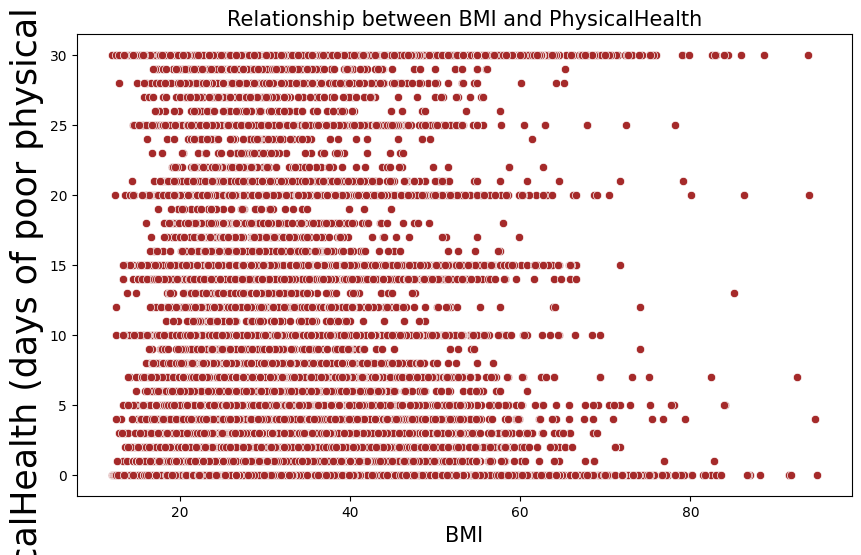

np.float64(0.10978754360968293)

In [8]:
#NUMBER4
# here we are going to explore the relationship between two continuous variables: BMI and PhysicalHealth
#here we are going to  use a scatter plot to visualize the relationship and calculate the correlation coefficient

import matplotlib.pyplot as plt
import seaborn as sns

#This is the Scatter plot for BMI vs PhysicalHealth
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lab['BMI'], y=lab['PhysicalHealth'], color='blue')

plt.title('Relationship between BMI and PhysicalHealth', fontsize=15)
plt.xlabel('BMI', fontsize=15)
plt.ylabel('PhysicalHealth (days of poor physical health)', fontsize=25)
plt.show()

# Calculating the correlation coefficient
correlation_bmi_physical_health = lab['BMI'].corr(lab['PhysicalHealth'])
correlation_bmi_physical_health


The scatter plot shows the relationship between BMI and PhysicalHealth (the number of days a person experiences poor physical health). The correlation coefficient between these variables is approximately 0.11, indicating a weak positive correlation. This suggests that as BMI increases, there is a slight tendency for individuals to report more days of poor physical health, but the relationship is not strong.


In [9]:
#NUMBER FIVE
#analyze the distribution of HeartDisease across different GenHealth categories
#use a crosstab to display the frequency and proportion of heart disease for each GenHealth category

# Crosstab of HeartDisease and GenHealth
genhealth_heartdisease_crosstab = pd.crosstab(lab['GenHealth'], lab['HeartDisease'], normalize='index')

# Displaying the crosstab to observe the proportions
genhealth_heartdisease_crosstab


HeartDisease,No,Yes
GenHealth,,
Excellent,0.977559,0.022441
Fair,0.795715,0.204285
Good,0.897368,0.102632
Poor,0.658960,0.341040
Very good,0.952739,0.047261


The crosstab created helps to show the proportionss of people with heart disease in each GenHealth category which aids on the determining of which general health status like it is associated with lower heart disease risk thus analyzing the relatioship btwn Heartdisease and Genhealth. 